# Load the Dataset

In [2]:
#Import the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

In [3]:
#Read the File

df1=pd.read_csv("QualityPrediction3.csv")

In [4]:
#Print the top five rows of data

df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#To check the shape of dataframe

print(df1.shape)

(1599, 12)


In [6]:
#To check the basic information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Data PreProcessing

In [7]:
'''Converting quality parameter to categorical.
For quality more than & equal to 6->1
For quality less than 7->0
'''
df1['quality'] = [ 1 if x>=6 else 0 for x in df1.quality] 


In [8]:
df1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


### Exploratory Data Analysis(EDA)

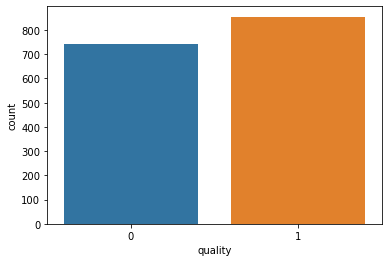

In [9]:
#To plot the count of target variable i.e quality
sns.countplot(x='quality', data=df1)


<Figure size 864x720 with 0 Axes>

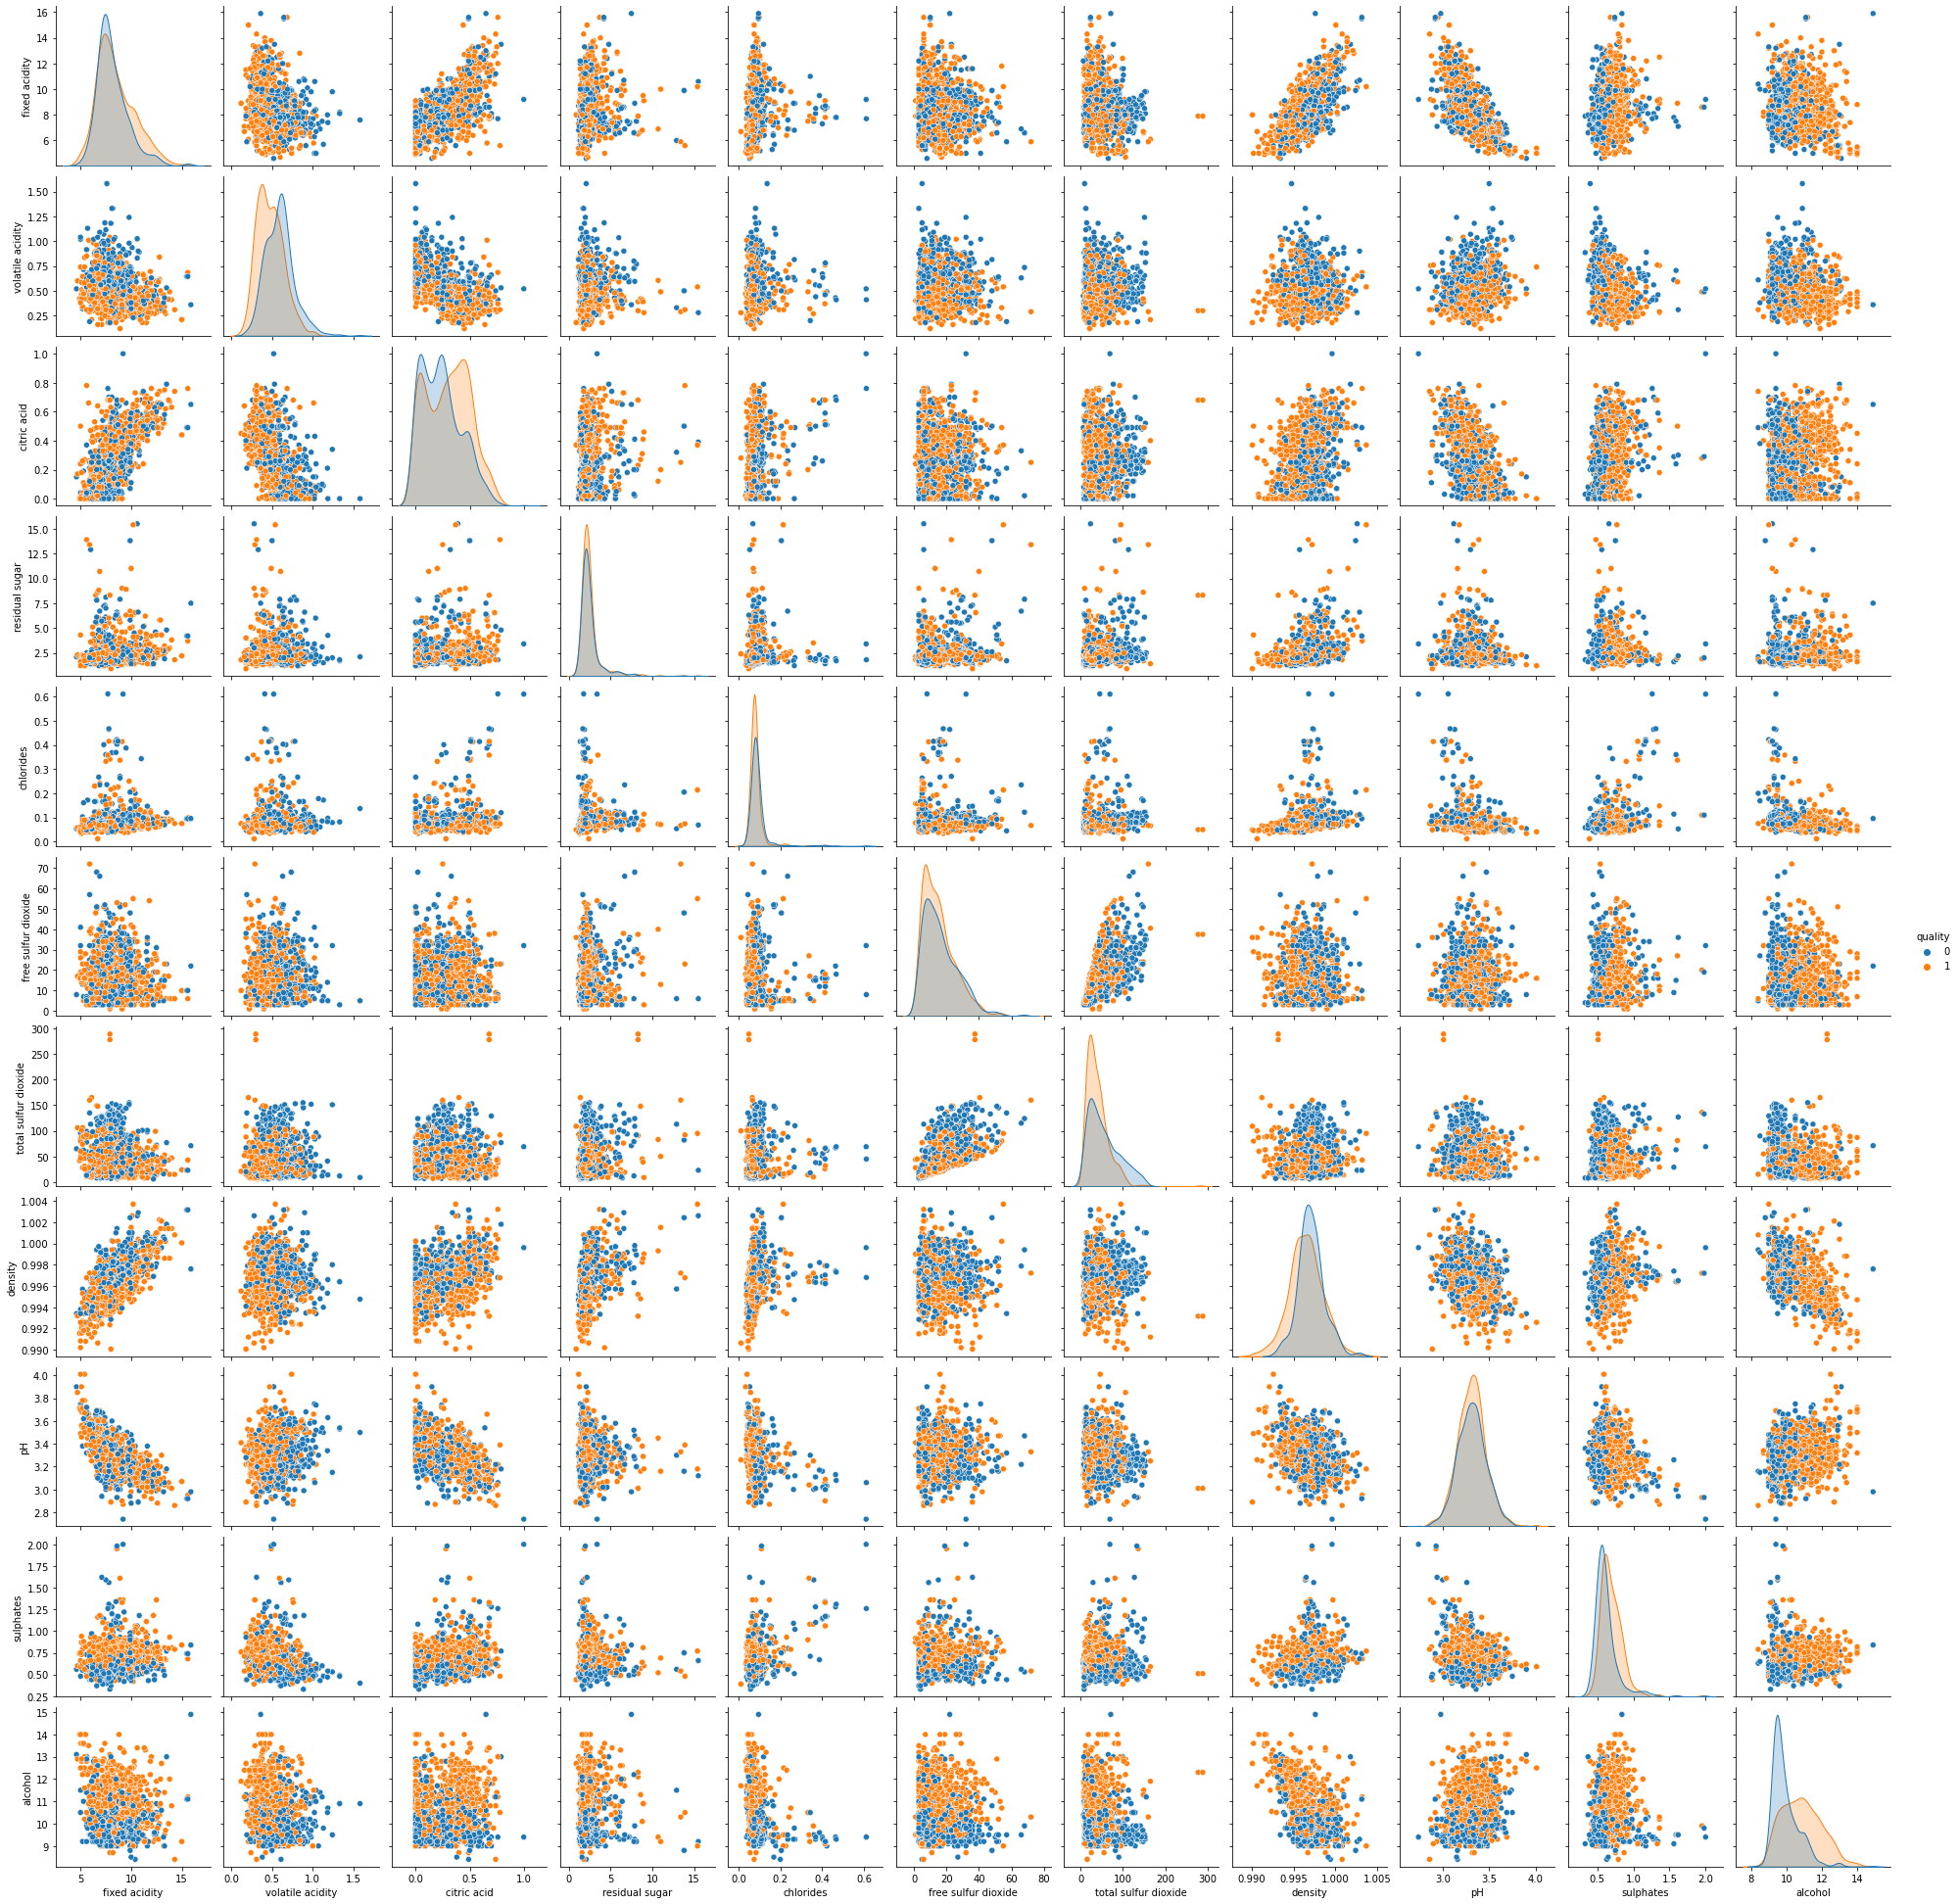

In [10]:
plt.figure(figsize = (12,10))
sns.pairplot(df1,hue="quality")


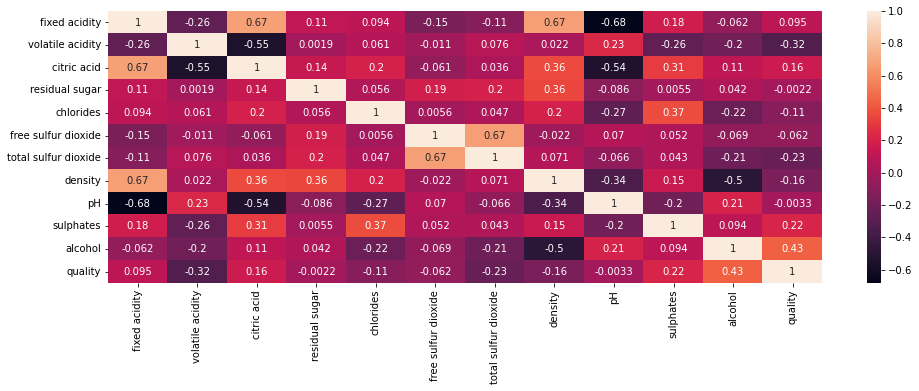

In [12]:
#To check the correlation between the variables

plt.figure(figsize = (16,5))
sns.heatmap(df1.corr(),annot=True)

We can observe from this correlation that quality is positively correlated to:
* alcohol with value 0.43
* sulphates with value 0.22
* citric acid with value 0.16
* fixed acidity with value 0.095

### Check for Missing Values

In [11]:
#To check if there are any null values

df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No Null/Missing data found

### Check for Outliers

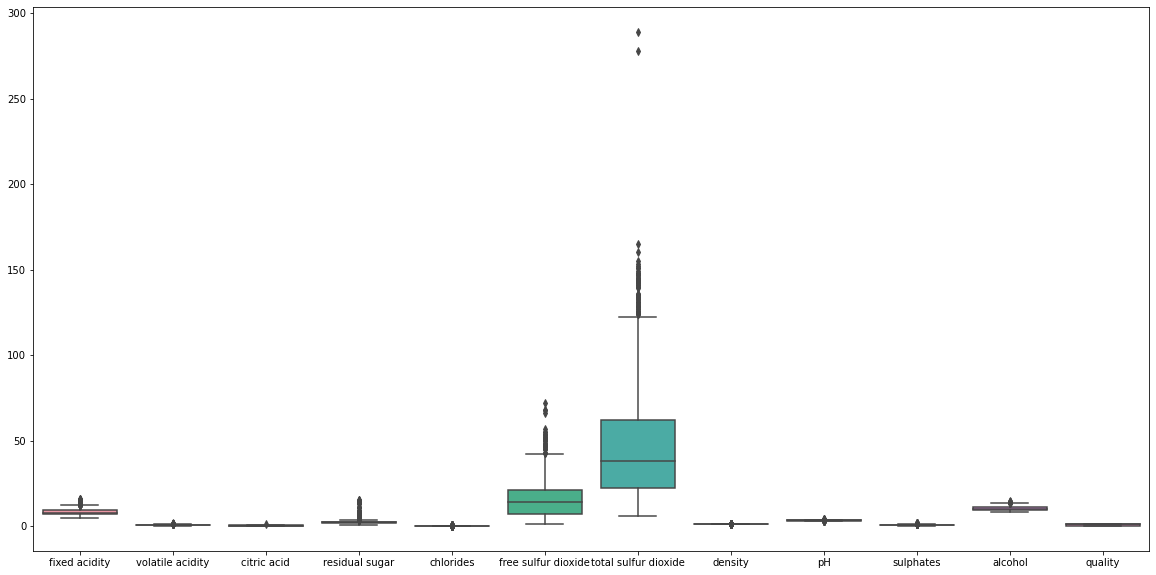

In [13]:
#prints the boxplot for all the parameters

plt.figure(figsize=(20,10))
sns.boxplot(data=df1)

In [14]:
#Calculating IQR

Q1 =df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [15]:
'''Checking for Outliers.
False-Not an Outlier
True-Outlier
'''
print((df1 < (Q1 - 1.5 * IQR)) |(df1> (Q3 + 1.5 * IQR)))


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

In [16]:
#Removing the outliers from the dataset

df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


In [17]:
#To check the shape of the dataframe after dropping the outliers
print(df1.shape)


(1194, 12)


Total 420 rows are dropped which consists of outliers


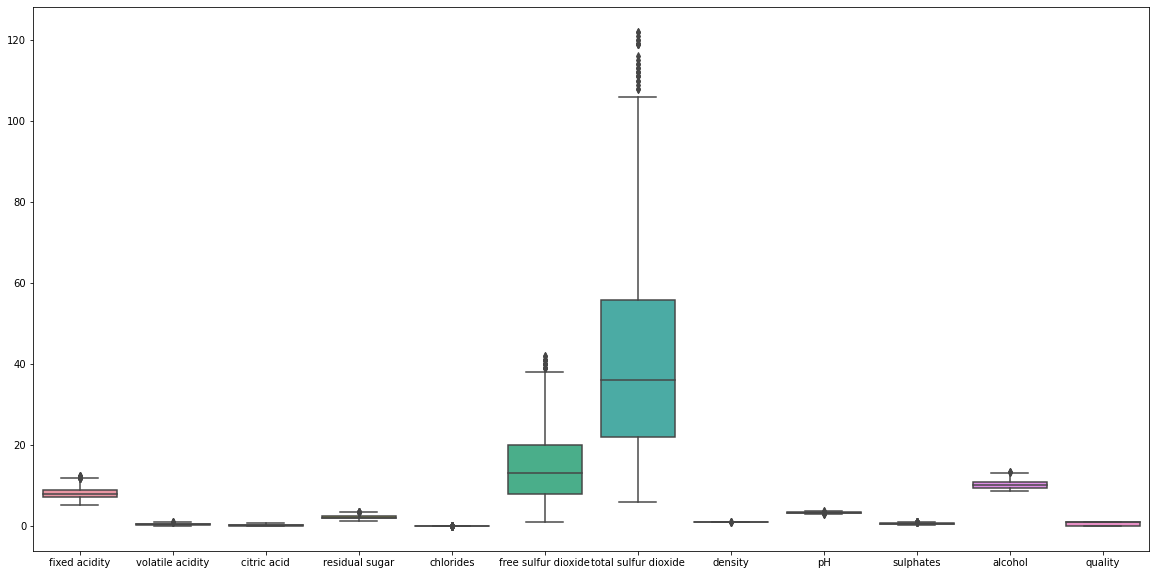

In [18]:
#To draw the boxplot of all the parametrs to check if there are still any outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df1)

From the boxplot we can see there are still some outliers in parameters. So we will remove outliers from each parameter

##### Fixed Acidity

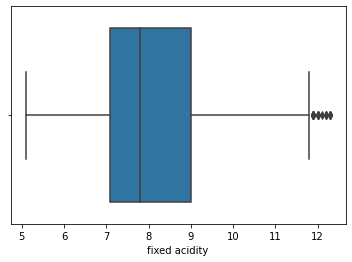

In [19]:
sns.boxplot(df1['fixed acidity'])

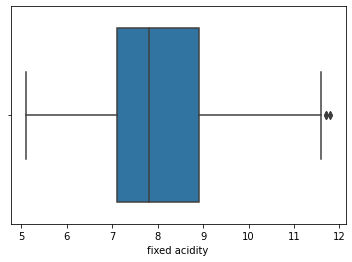

In [20]:
#Based on the diagram we can see there are some outliers in the right tail. We can remove the top 2%  to remove outliers
df1=df1[df1['fixed acidity']<df1['fixed acidity'].quantile(0.98)]
sns.boxplot(df1['fixed acidity'])

##### Volatile Acidity


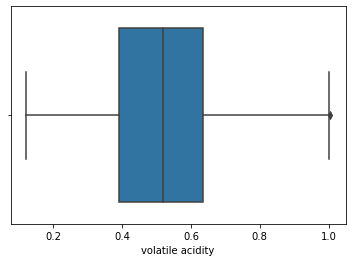

In [21]:
sns.boxplot(df1['volatile acidity'])

No outliers


##### Citric acid

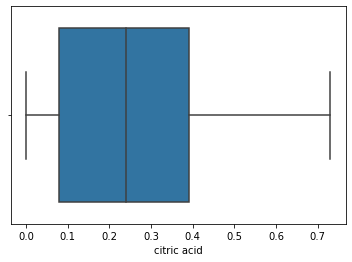

In [22]:
sns.boxplot(df1['citric acid'])

No outliers


##### Residual Sugar

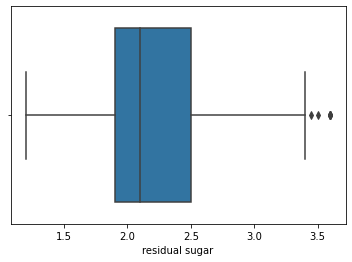

In [23]:
sns.boxplot(df1['residual sugar'])

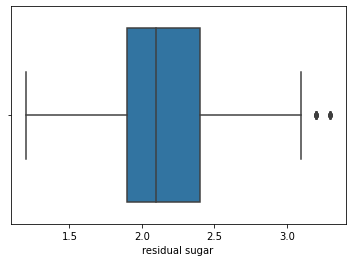

In [24]:
#Based on the diagram we can see there are some outliers in the right tail. We can remove the top 1%  to remove outliers
q = df1['residual sugar'].quantile(0.99)
df1 = df1[df1['residual sugar'] < q]

sns.boxplot(df1['residual sugar'])

##### Chlorides

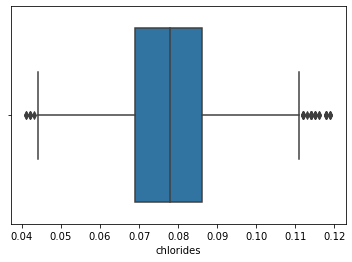

In [25]:
sns.boxplot(df1['chlorides'])

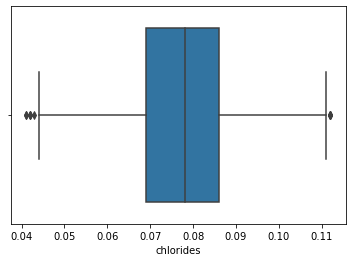

In [26]:
#Based on the diagram we can see there are some outliers in the right & left tail. We can remove the top 2%  to remove outliers
q = df1['chlorides'].quantile(0.98)
df1 = df1[df1['chlorides'] < q]

sns.boxplot(df1['chlorides'])

##### free sulfur dioxide

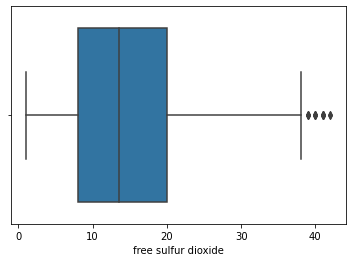

In [27]:
sns.boxplot(df1['free sulfur dioxide'])

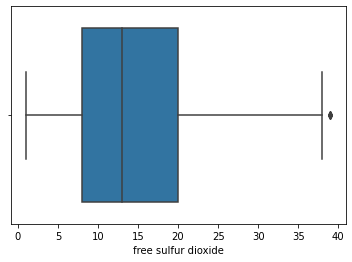

In [28]:
#Based on the diagram we can see there are some outliers in the right tail. We can remove the top 1%  to remove outliers
q = df1['free sulfur dioxide'].quantile(0.99)
df1 = df1[df1['free sulfur dioxide'] < q]

sns.boxplot(df1['free sulfur dioxide'])

##### total sulfur dioxide

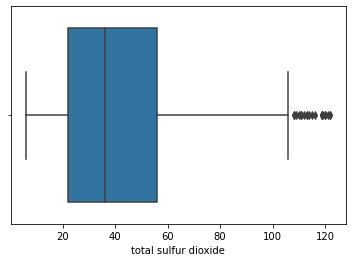

In [29]:
sns.boxplot(df1['total sulfur dioxide'])

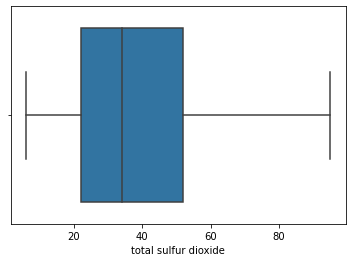

In [30]:
#Based on the diagram we can see there are some outliers in the right tail. We can remove the top 5%  to remove outliers

q = df1['total sulfur dioxide'].quantile(0.95)
df1 = df1[df1['total sulfur dioxide'] < q]

sns.boxplot(df1['total sulfur dioxide'])

##### density

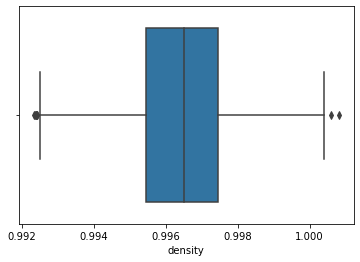

In [31]:
sns.boxplot(df1['density'])

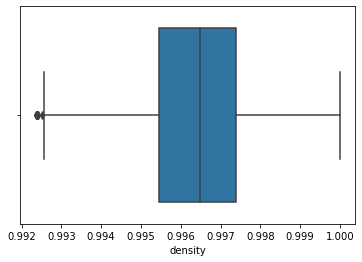

In [32]:
#Based on the diagram we can see there are some outliers in the right & left tail. We can remove the top 1%  to remove outliers
q = df1['density'].quantile(0.99)
df1 = df1[df1['density'] < q]

sns.boxplot(df1['density'])

##### pH

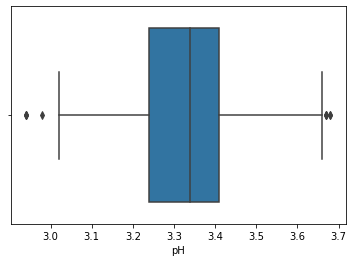

In [33]:
sns.boxplot(df1['pH'])

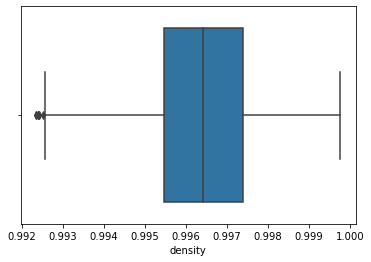

In [34]:
#Based on the diagram we can see there are some outliers in the right & left tail. We can remove the top 1%  to remove outliers
q = df1['density'].quantile(0.99)
df1 = df1[df1['density'] < q]

sns.boxplot(df1['density'])

##### sulphates

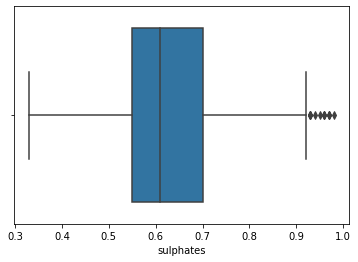

In [35]:
sns.boxplot(df1['sulphates'])

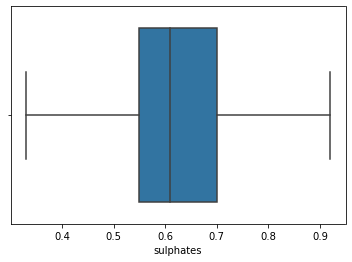

In [36]:
#Based on the diagram we can see there are some outliers in the right tail. We can remove the top 1%  to remove outliers
q = df1['sulphates'].quantile(0.99)
df1 = df1[df1['sulphates'] < q]

sns.boxplot(df1['sulphates'])

##### alcohol

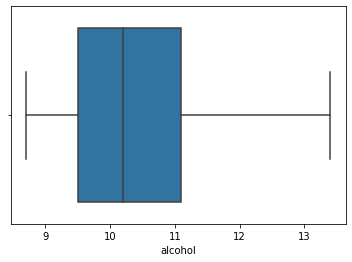

In [37]:
sns.boxplot(df1['alcohol'])

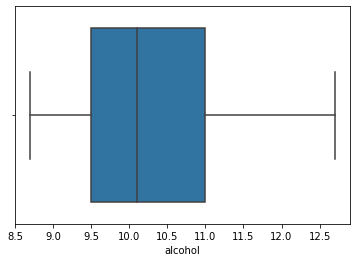

In [38]:
#Based on the diagram we can see there are some outliers in the right tail. We can remove the top 1%  to remove outliers
q = df1['alcohol'].quantile(0.99)
df1 = df1[df1['alcohol'] < q]

sns.boxplot(df1['alcohol'])

### Defining Features & Target Variable

In [39]:
'''Features used for classification: fixed acidity,citric acid, sulphates, alcohol
Target used for classification: quality
'''
features=df1.iloc[:,[0,2,9,10]]
target=df1.iloc[:,11]

### Standardize the features

In [40]:
#StandardScaler will rescale the features
sc=StandardScaler()
scaled_features=sc.fit_transform(features)

# Model 1- Logistic Regression

In [41]:
#Split the data into 70% train & 30% test

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42) 


In [42]:
#Instantiating & Fitting the model to training dataset

log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [43]:
#Prediction of Test dataset
y_pred=log_reg.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtyp

In [44]:
y_test

1364    1
1563    0
172     1
1019    0
829     1
       ..
7       1
257     0
952     1
1596    1
867     1
Name: quality, Length: 299, dtype: int64

### Evaluation Metrics

##### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[ 86,  43],
       [ 43, 127]], dtype=int64)

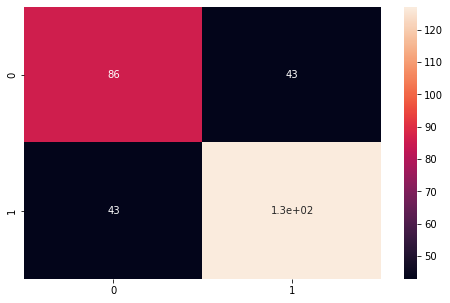

In [46]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True,ax=ax)

#### Accuracy

In [47]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7123745819397993


#### Precision

In [48]:
print("Precision: ", metrics.precision_score(y_test,y_pred))

Precision:  0.7470588235294118


#### Recall

In [49]:
print("Recall: ", metrics.recall_score(y_test,y_pred))

Recall:  0.7470588235294118


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       129
           1       0.75      0.75      0.75       170

    accuracy                           0.71       299
   macro avg       0.71      0.71      0.71       299
weighted avg       0.71      0.71      0.71       299



#### ROC & AUC

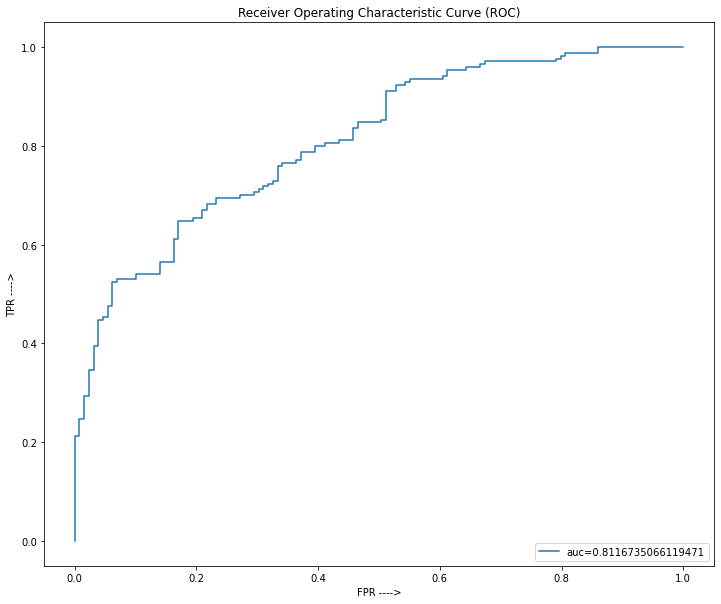

In [51]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# Model 2- Decision Tree

In [52]:
'''Features used for classification: all the parameters except quality
Target used for classification: quality
'''
features_dt=df1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].values
target_dt=df1.iloc[:,11].values

In [53]:
#Split the data into 70% train & 30% test

x_train_dt,x_test_dt,y_train_dt,y_test_dt = train_test_split(features_dt,target_dt,test_size=0.3)

### Decision Tree with Cart(Gini)

#### Decision Tree with depth 2

In [54]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train_dt,y_train_dt)

model_dt_2_score_tarin = model_dt_2.score(x_train_dt,y_train_dt)

model_dt_2_score_test = model_dt_2.score(x_test_dt,y_test_dt)

print('Training Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

Training Score 0.7116212338593975
Testing Score 0.6989966555183946


#### Decision Tree with depth 3


In [55]:
model_dt_3= DecisionTreeClassifier(random_state=1,max_depth=3)

model_dt_3.fit(x_train_dt,y_train_dt)

model_dt_3_score_tarin = model_dt_3.score(x_train_dt,y_train_dt)

model_dt_3_score_test = model_dt_3.score(x_test_dt,y_test_dt)

print('Training Score',model_dt_3_score_tarin)

print('Testing Score',model_dt_3_score_test)

Training Score 0.7431850789096126
Testing Score 0.705685618729097


#### Decision Tree with depth 4

In [56]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train_dt,y_train_dt)

model_dt_4_score_tarin = model_dt_4.score(x_train_dt,y_train_dt)

model_dt_4_score_test = model_dt_4.score(x_test_dt,y_test_dt)

print('Training Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

Training Score 0.7776183644189383
Testing Score 0.6923076923076923


#### Decision Tree with depth 5


In [57]:
model_dt_5 = DecisionTreeClassifier(random_state=1,max_depth=5)

model_dt_5.fit(x_train_dt,y_train_dt)

model_dt_5_score_tarin = model_dt_5.score(x_train_dt,y_train_dt)

model_dt_5_score_test = model_dt_5.score(x_test_dt,y_test_dt)

print('Training Score',model_dt_5_score_tarin)

print('Testing Score',model_dt_5_score_test)

Training Score 0.7919655667144907
Testing Score 0.705685618729097


#### Decision Tree with depth 6

In [58]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train_dt,y_train_dt)

model_dt_6_score_tarin = model_dt_6.score(x_train_dt,y_train_dt)

model_dt_6_score_test = model_dt_6.score(x_test_dt,y_test_dt)

print('Training Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

Training Score 0.8579626972740315
Testing Score 0.6555183946488294


As we can see the training score is increasing from depth 2 to 6 but the testing score is decreasing & i constant around depth 4 & 5.We can conclude from the results that we are overfitting the data and Decision tree with depth 4/5 can be used to fit the data.

### Decision Tree with c4.5(entropy)

#### Decision Tree with depth 2

In [59]:
model_dt_ent2 = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt_ent2.fit(x_train_dt,y_train_dt)

y_pred_dt = model_dt_ent2.predict_proba(x_test_dt)[:,1]

model_dt_ent2_score_train = model_dt_ent2.score(x_train_dt,y_train_dt)
print(model_dt_ent2_score_train)

model_dt_ent2_score_test = model_dt_ent2.score(x_test_dt,y_test_dt)
print(model_dt_ent2_score_test)

0.6843615494978479
0.6588628762541806


#### Decision Tree with depth 4

In [60]:
model_dt_ent4 = DecisionTreeClassifier(max_depth=4,criterion='entropy')

model_dt_ent4.fit(x_train_dt,y_train_dt)

y_pred_dt = model_dt_ent4.predict_proba(x_test_dt)[:,1]

model_dt_ent4_score_train = model_dt_ent4.score(x_train_dt,y_train_dt)
print(model_dt_ent4_score_train)

model_dt_ent4_score_test = model_dt_ent4.score(x_test_dt,y_test_dt)
print(model_dt_ent4_score_test)

0.7446197991391679
0.6989966555183946


#### Decision Tree with depth 5

In [61]:
model_dt_ent5 = DecisionTreeClassifier(max_depth=5,criterion='entropy')

model_dt_ent5.fit(x_train_dt,y_train_dt)

y_pred_dt = model_dt_ent5.predict_proba(x_test_dt)[:,1]

model_dt_ent5_score_train = model_dt_ent5.score(x_train_dt,y_train_dt)
print(model_dt_ent5_score_train)

model_dt_ent5_score_test = model_dt_ent5.score(x_test_dt,y_test_dt)
print(model_dt_ent5_score_test)

0.793400286944046
0.7491638795986622


Even in the entropy criteria the testing score is decreasing and is contant around depth 4/5 like gini.

In [62]:
#Using model with depth 5 as final model to predict

predictions = model_dt_5.predict(x_test_dt)
# print(predictions)

print(model_dt_5.score(x_test_dt,y_test_dt))
y_actual_result = y_test_dt[0]
# print(y_actual_result)

0.705685618729097


### Evaluation Metrics

##### Confusion Matrix

In [63]:
print(confusion_matrix(y_test_dt,predictions))

[[ 79  61]
 [ 27 132]]


In [64]:
def create_conf_mat(y_test_dt, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test_dt.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test_dt.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test_dt,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

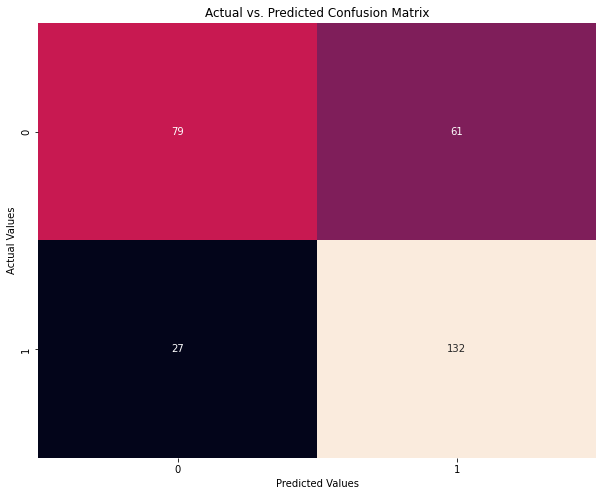

In [65]:
plt.figure(figsize=(10,8))
conf_mat = create_conf_mat(y_test_dt, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### Accuracy

In [66]:
accuracy_score(y_test_dt,predictions)

0.705685618729097

#### Precision

In [67]:
print("Precision: ", metrics.precision_score(y_test_dt,predictions))

Precision:  0.6839378238341969


#### Recall

In [68]:
print("Recall: ", metrics.recall_score(y_test_dt,predictions))

Recall:  0.8301886792452831


#### Classification Report

In [69]:
print(classification_report(y_test_dt,predictions))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64       140
           1       0.68      0.83      0.75       159

    accuracy                           0.71       299
   macro avg       0.71      0.70      0.70       299
weighted avg       0.71      0.71      0.70       299



#### ROC & AUC 

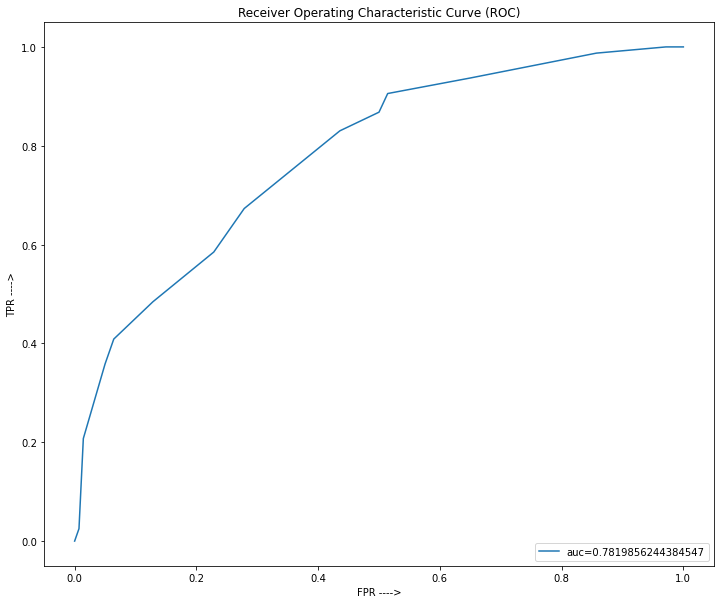

In [70]:
y_pred_proba_dt = model_dt_5.predict_proba(x_test_dt)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_dt,  y_pred_proba_dt)
auc = metrics.roc_auc_score(y_test_dt, y_pred_proba_dt)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# Model 3- Random Forest

In [71]:
#Assigning the column names to the list

names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'] 

dx = ['0','1']

In [72]:
'''Features used for classification: all the parameters except quality
Target used for classification: quality
'''
feature_space = df1.iloc[:, df1.columns != 'quality']
feature_class = df1.iloc[:, df1.columns== 'quality']

In [73]:
#Split Data set into Train and Test
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,feature_class,
                                                                        test_size=0.20,random_state=40)

In [74]:
#To flatten the values
class_set = class_set.values.ravel()
test_class_set = test_class_set.values.ravel()

In [75]:
#instantiating the classifier
fit_rf = RandomForestClassifier(random_state=40)

### Hyper_Parameter Optimization Using GridSearchCV

In [76]:
import time
np.random.seed(40)
start = time.time()

param_dist = {'max_depth':[2,3,4,5],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(training_set,class_set)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
Time taken in grid search: 137.23


In [77]:
#Setting the paramters with best parameters found using grid search
fit_rf.set_params(criterion='gini',max_features = 'auto',max_depth = 5)

RandomForestClassifier(max_depth=5, random_state=40)

### OOB Rate

In [78]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [79]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

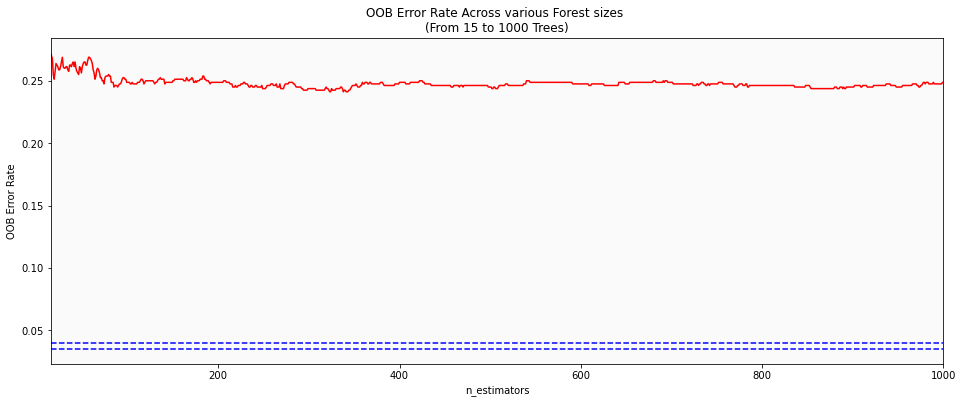

In [80]:
fig, ax = plt.subplots(figsize=(16,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.035,color='blue',linestyle='--')
plt.axhline(0.04,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

In this diagram we can see the error rate is constant arround 550-600 n_estimators.

In [81]:
print('OOB Error rate for 550 trees is: %0.5f'%oob_series[550])

OOB Error rate for 550 trees is: 0.24874


In [82]:
#Setting the parameters with the n_estimator value where there is constant error rate
fit_rf.set_params(n_estimators=550,bootstrap=True,warm_start=False,oob_score=False)

RandomForestClassifier(max_depth=5, n_estimators=550, random_state=40)

In [83]:
#Train the Random Forest

fit_rf.fit(training_set,class_set)

RandomForestClassifier(max_depth=5, n_estimators=550, random_state=40)

In [84]:
#To calculate the index of column names
names_index = names[:]


### Variable Importance

In [85]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' [is not an instantiated model from scikit-learn]".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [86]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']
print(indices_rf.shape)

(11,)


In [87]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [88]:
#It will print the features from highest to lowest based on the Mean deacrease in Impurity
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'alcohol' has a Mean Decrease in Impurity of 0.28237
2. The feature 'sulphates' has a Mean Decrease in Impurity of 0.19474
3. The feature 'volatile acidity' has a Mean Decrease in Impurity of 0.11642
4. The feature 'density' has a Mean Decrease in Impurity of 0.09368
5. The feature 'citric acid' has a Mean Decrease in Impurity of 0.05474
6. The feature 'chlorides' has a Mean Decrease in Impurity of 0.05375
7. The feature 'total sulfur dioxide' has a Mean Decrease in Impurity of 0.04923
8. The feature 'fixed acidity' has a Mean Decrease in Impurity of 0.04556
9. The feature 'pH' has a Mean Decrease in Impurity of 0.04464
10. The feature 'free sulfur dioxide' has a Mean Decrease in Impurity of 0.03536
11. The feature 'residual sugar' has a Mean Decrease in Impurity of 0.02952


### Predictions

In [89]:
predictions_rf = fit_rf.predict(test_set)

In [90]:
print(predictions_rf)

[0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1]


In [91]:
print(test_class_set)

[0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1
 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0]


## Evaluation Metrics

#### Confusion Matrix

In [92]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

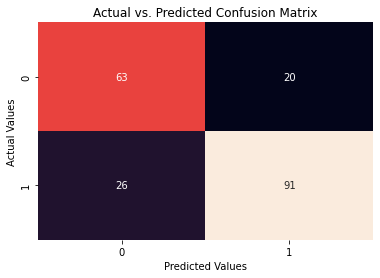

In [93]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### Accuracy

In [94]:
accuracy_rf = fit_rf.score(test_set,test_class_set)
print("Here our Accuracy of model is: %0.5f"%accuracy_rf)

Here our Accuracy of model is: 0.77000


#### Test error rate

In [95]:
test_error_rate_rf = 1-accuracy_rf
print("error rate of our model is: %0.5f"%test_error_rate_rf)

error rate of our model is: 0.23000


#### Classification Report

In [99]:
def print_class_report(predictions, alg_name):
    """
     Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn.
    """
    print('Classification Report for %s: '%alg_name)
    print(classification_report(predictions, test_class_set, target_names = dx))

In [100]:
class_report = print_class_report(predictions_rf,'Random Forest')

Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        89
           1       0.78      0.82      0.80       111

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.77       200
weighted avg       0.77      0.77      0.77       200



#### ROC & AUC

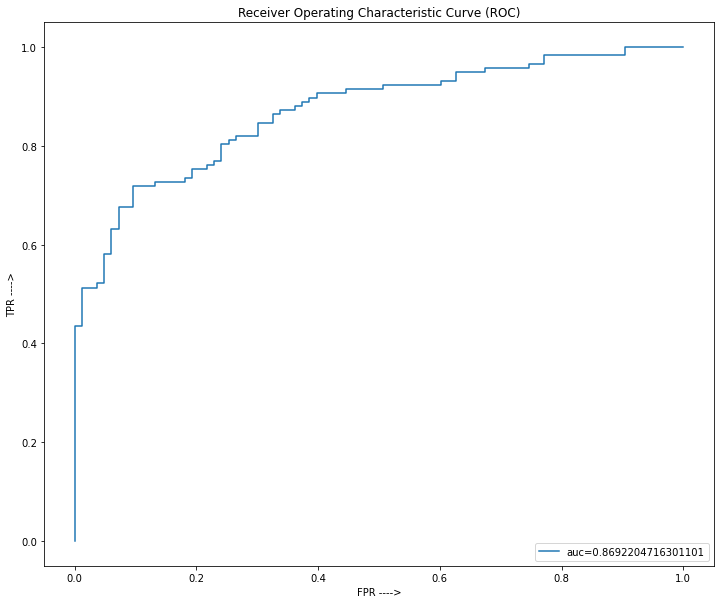

In [101]:
y_pred_proba_rf = fit_rf.predict_proba(test_set)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_class_set,  y_pred_proba_rf)
auc = metrics.roc_auc_score(test_class_set, y_pred_proba_rf)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# Model 4: Ada Boost

In [102]:
'''Features used for classification: all the parameters except quality
Target used for classification: quality
'''
feature_space_ada = df1.iloc[:, df1.columns != 'quality']
feature_class_ada = df1.iloc[:, df1.columns== 'quality']

In [103]:
#Split Data set into Train and Test
training_set_ada, test_set_ada, class_set_ada, test_class_set_ada = train_test_split(feature_space_ada,feature_class_ada,
                                                                        test_size=0.20,random_state=40)

In [104]:
#To flatten the values
class_set_ada = class_set_ada.values.ravel()
test_class_set_ada = test_class_set_ada.values.ravel()

In [105]:
#Instantiate the classifier
abc = AdaBoostClassifier(random_state=0)

### Hyper_Parameter Optimization Using GridSearchCV

In [123]:
import time
np.random.seed(40)
start = time.time()

param_dist = {'n_estimators': np.arange(10,1000,10),
            'learning_rate': [0.01, 0.05, 0.1, 1,0.5]}

cv_ada = GridSearchCV(abc,cv=10,param_grid=param_dist,n_jobs=3)

cv_ada.fit(training_set_ada,class_set_ada)
print('Best Parameters using Grid search: \n',cv_ada.best_params_)
end = time.time()
print('Time taken in grid search: %0.2f'%(end-start))

Best Parameters using Grid search: 
 {'learning_rate': 0.1, 'n_estimators': 630}
Time taken in grid search: 2408.69


In [106]:
#Setting the paramters with best parameters found using grid search
abc.set_params(n_estimators=630,learning_rate=0.1)

AdaBoostClassifier(learning_rate=0.1, n_estimators=630, random_state=0)

In [107]:
# Train Adaboost Classifer
abc.fit(training_set_ada, class_set_ada)


AdaBoostClassifier(learning_rate=0.1, n_estimators=630, random_state=0)

In [108]:
#Predict the response for test dataset
prediction_ada = abc.predict(test_set_ada)
prediction_ada

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [109]:
test_class_set_ada

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0], dtype=int64)

## Evaluation Metrics

#### Confusion Matrix

In [110]:
def create_conf_mat(test_class_set_ada, predictions_ada):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set_ada.shape) != len(predictions_ada.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set_ada.shape != predictions_ada.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set_ada,
                                        columns = predictions_ada)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

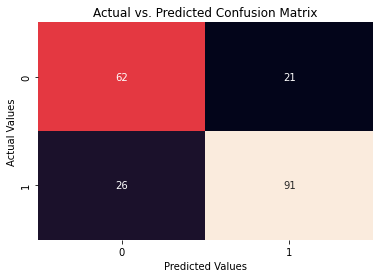

In [111]:
conf_mat = create_conf_mat(test_class_set_ada, prediction_ada)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

#### Accuracy

In [112]:
acc_ada=accuracy_score(test_class_set_ada, prediction_ada)
print("AdaBoost Classifier Model Accuracy:", acc_ada)

AdaBoost Classifier Model Accuracy: 0.765


#### Precision

In [113]:
print("Precision: ", metrics.precision_score(test_class_set_ada, prediction_ada))

Precision:  0.8125


#### Recall

In [114]:
print("Recall: ", metrics.recall_score(test_class_set_ada, prediction_ada))

Recall:  0.7777777777777778


#### Classification Report

In [118]:
def print_class_report(predictions, alg_name):
    """
     Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn.
    """
    print('Classification Report for %s: '%alg_name)
    print(classification_report(prediction_ada, test_class_set_ada, target_names = dx))

In [119]:
class_report = print_class_report(prediction_ada,'Ada Boosting')

Classification Report for Ada Boosting: 
              precision    recall  f1-score   support

           0       0.75      0.70      0.73        88
           1       0.78      0.81      0.79       112

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.77      0.76       200



#### ROC & AUC

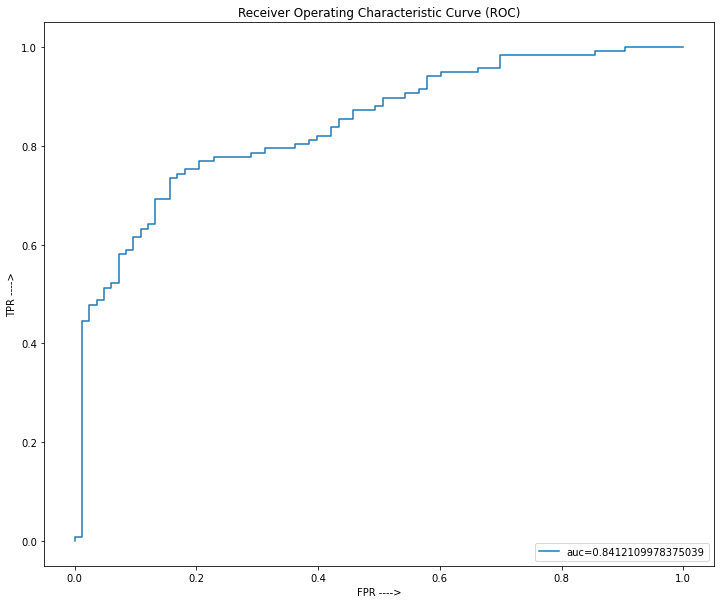

In [120]:
y_pred_proba_ada = abc.predict_proba(test_set_ada)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_class_set_ada,  y_pred_proba_ada)
auc = metrics.roc_auc_score(test_class_set_ada, y_pred_proba_ada)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# Comparing ROC Accuracy Score for all the 4 models

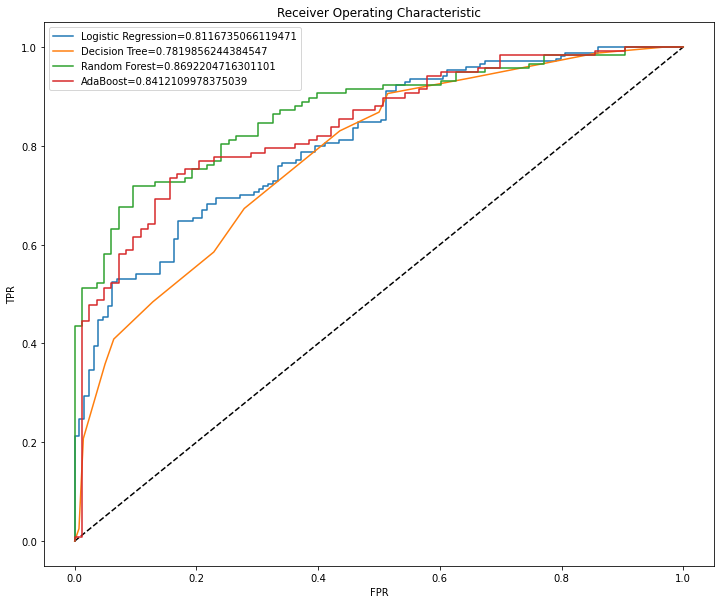

In [121]:

y_pred_prob1 = log_reg.predict_proba(X_test)[::,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test,y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)

y_pred_prob2 = model_dt_5.predict_proba(x_test_dt)[::,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test_dt, y_pred_proba_dt)
auc2 = metrics.roc_auc_score(y_test_dt, y_pred_proba_dt)

y_pred_prob3 = fit_rf.predict_proba(test_set)[::,1]
fpr3 , tpr3, thresholds3 = roc_curve(test_class_set,y_pred_proba_rf)
auc3 = metrics.roc_auc_score(test_class_set, y_pred_proba_rf)

y_pred_prob4 = abc.predict_proba(test_set_ada)[::,1]
fpr4 , tpr4, thresholds4 = roc_curve(test_class_set_ada,y_pred_proba_ada)
auc4 = metrics.roc_auc_score(test_class_set_ada, y_pred_proba_ada)
plt.figure(figsize=(12,10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Regression="+str(auc1))
plt.plot(fpr2,tpr2,label="Decision Tree="+str(auc2))
plt.plot(fpr3,tpr3,label="Random Forest="+str(auc3))
plt.plot(fpr4,tpr4,label="AdaBoost="+str(auc4))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()